<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_03_1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3.1(2): Classificação: Dataset Titanic
Objetivo: Prever se um passageiro sobreviveu ao naufrágio do Titanic (classificação binária)

Passos:
1. Carregamento e Exploração dos Dados.
2. Pré-processamento: tratar valores ausentes (missing values); codificar variáveis categóricas; criar novas features (feature engineering).
3. Treinamento de Modelos: modelo base: Regressão Logística; modelos avançados: Random Forest e Gradient Boosting.
4. Ajuste de Hiperparâmetros: usar GridSearchCV para otimizar o Random Forest.
5. Ensemble Learning: combinar previsões com VotingClassifier.
6. Avaliação e Visualização: matriz de confusão e métricas detalhadas.

## Roteiro de execução

1. Carregamento e Exploração dos Dados

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

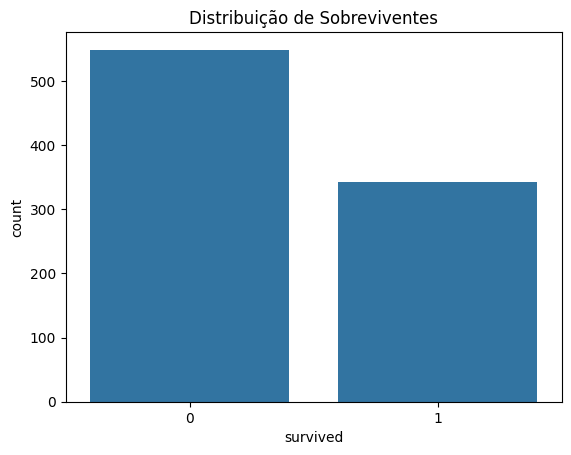

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset Titanic do seaborn
# https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv
df = sns.load_dataset('titanic')

# Visualizar as primeiras linhas
print(df.head())

# Resumo básico
print(df.info())

# Visualizar distribuição da variável alvo
sns.countplot(x='survived', data=df)
plt.title('Distribuição de Sobreviventes')
plt.show()

2. Pré-processamento
- Tratar valores ausentes (missing values).
- Codificar variáveis categóricas.
- Criar novas features (feature engineering).

In [ ]:
# Tratar valores ausentes
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Codificar variáveis categóricas
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Feature engineering: criar variável 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Selecionar features e alvo
X = df[['pclass', 'age', 'fare', 'family_size', 'sex_male', 'embarked_Q', 'embarked_S']]
y = df['survived']

3. Treinamento de Modelos
- Modelo base: Regressão Logística.
- Modelos avançados: Random Forest e Gradient Boosting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base: Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_log))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Acurácia Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

Acurácia Regressão Logística: 0.8044692737430168
Acurácia Random Forest: 0.8268156424581006
Acurácia Gradient Boosting: 0.8044692737430168


4. Ajuste de Hiperparâmetros
- Usar GridSearchCV para otimizar o Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': 10, 'n_estimators': 100}
Melhor acurácia: 0.8103910174332711


5. Ensemble Learning
- Combinar previsões com VotingClassifier.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', log_reg)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Acurácia Voting Classifier:", accuracy_score(y_test, y_pred_voting))

Acurácia Voting Classifier: 0.8156424581005587


6. Avaliação e Visualização
- Matriz de confusão e métricas detalhadas.

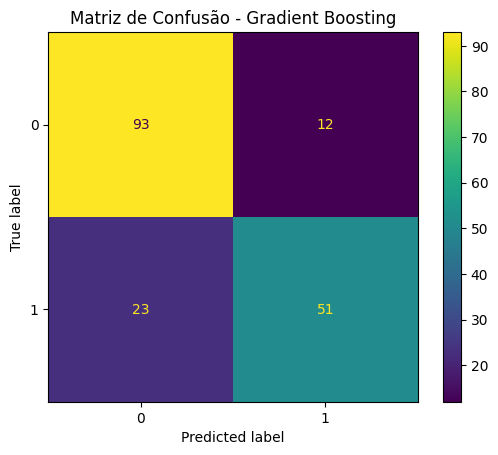

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Gradient Boosting')
plt.show()

print(classification_report(y_test, y_pred_gb))

## Exercício

Tente melhorar o modelo Gradient Boosting adicionando uma nova feature (ex.: extrair título do nome dos passageiros). Comente suas ações e quais resultados obteve.

### Exercício complementar opcional
Aplique o mesmo processo a outro dataset de classificação, como o Iris (`sns.load_dataset('iris')`).